<a href="https://colab.research.google.com/github/Lyu-Sterkh/Sentiment-analysis/blob/main/Sent_analysis_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [ ]:
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Google Drive

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# Read in data

In [ ]:
df_pos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_pos.csv', index_col='Unnamed: 0')
df_pos = df_pos.drop(columns=['Score', 'Id'])
df_pos.head()

,Text,Sentiment
0,I have bought several of the Vitality canned d...,1
2,This is a confection that has been around a fe...,1
4,Great taffy at a great price. There was a wid...,1
5,I got a wild hair for taffy and ordered this f...,1
6,This saltwater taffy had great flavors and was...,1


In [ ]:
df_neg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_neg.csv', index_col='Unnamed: 0')
df_neg = df_neg.drop(columns=['Score', 'Id'])
df_neg.head()

,Text,Sentiment
1,Product arrived labeled as Jumbo Salted Peanut...,0
3,If you are looking for the secret ingredient i...,0
12,My cats have been happily eating Felidae Plati...,0
16,I love eating them and they are good for watch...,0
26,"The candy is just red , No flavor . Just plan...",0


In [ ]:
df = pd.concat((df_neg, df_pos), axis=0).sample(frac=1)
df.head(20)

,Text,Sentiment
1258,We found this on our recent trip to England an...,1
4316,Love this mix for pancakes!<br />Many GF produ...,1
4085,I have little doubt that the Blue Icicle will ...,1
219,"I love strong, full bodied quality tea and typ...",1
2469,I have tried all the different brands of cocon...,1
43,McCann's Oatmeal is a good quality choice. Ou...,1
3956,"I love the product. But, the bottle design is...",0
3663,If people would read the ingredients they woul...,1
334,Taste like it is stale. Will not order this a...,0
28,I got this for my Mum who is not diabetic but ...,1


# Preprocessing

In [ ]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['br', 'href'])

In [ ]:
# Create preprocess with lemmatization
def df_preprocess_lemma(text):
    text = text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', 'site', text)
    text = re.sub('@[^\s]+', 'user', text)
    text = re.sub('[^а-яА-яa-zA-Z ]', ' ', text)
    wnl = WordNetLemmatizer()
    text = ' '.join([wnl.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

In [ ]:
df['Text'] = df['Text'].apply(df_preprocess_lemma)

In [ ]:
df['Text'][25]

'product received advertised site strawberry ounce bag pack'

# Vectorization

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
matrix = vectorizer.fit_transform(df['Text']).toarray()

# Train_test_split

In [ ]:
X = matrix
y = df['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, test_size=0.3,
                                                    random_state=73)

# Sequential

## Model and layers

In [ ]:
SENTENCE_LENGTH = 10931
num_words = 100000

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(64,activation='relu',input_shape=(SENTENCE_LENGTH,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                699648    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 703,873
Trainable params: 703,873
Non-trainable params: 0
_________________________________________________________________


## Compile

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

## Fit

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
7/7 [==============================] - 2s 194ms/step - loss: 0.5901 - accuracy: 0.8002 - val_loss: 0.4954 - val_accuracy: 0.8360
Epoch 2/20
7/7 [==============================] - 1s 98ms/step - loss: 0.4572 - accuracy: 0.8357 - val_loss: 0.4356 - val_accuracy: 0.8360
Epoch 3/20
7/7 [==============================] - 1s 110ms/step - loss: 0.3787 - accuracy: 0.8360 - val_loss: 0.3811 - val_accuracy: 0.8360
Epoch 4/20
7/7 [==============================] - 1s 164ms/step - loss: 0.3092 - accuracy: 0.8434 - val_loss: 0.3439 - val_accuracy: 0.8433
Epoch 5/20
7/7 [==============================] - 1s 173ms/step - loss: 0.2486 - accuracy: 0.8867 - val_loss: 0.2978 - val_accuracy: 0.8846
Epoch 6/20
7/7 [==============================] - 1s 181ms/step - loss: 0.1969 - accuracy: 0.9300 - val_loss: 0.2768 - val_accuracy: 0.8984
Epoch 7/20
7/7 [==============================] - 1s 175ms/step - loss: 0.1532 - accuracy: 0.9561 - val_loss: 0.2756 - val_accuracy: 0.8999
Epoch 8/20
7/7 [=====

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1)

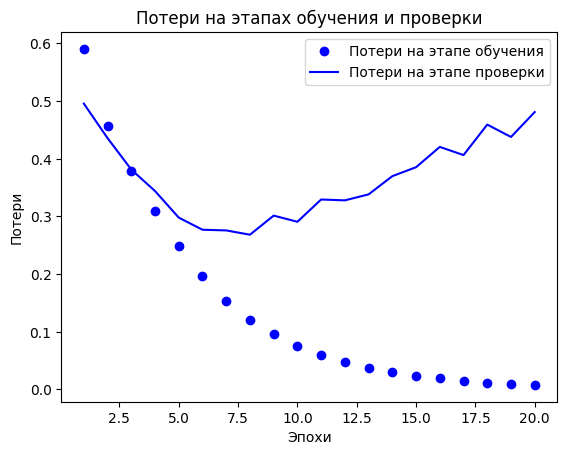

In [ ]:
plt.plot(epochs, loss_values, 'bo', label = 'Потери на этапе обучения')
plt.plot(epochs, val_loss_values, 'b', label = 'Потери на этапе проверки')
plt.title('Потери на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

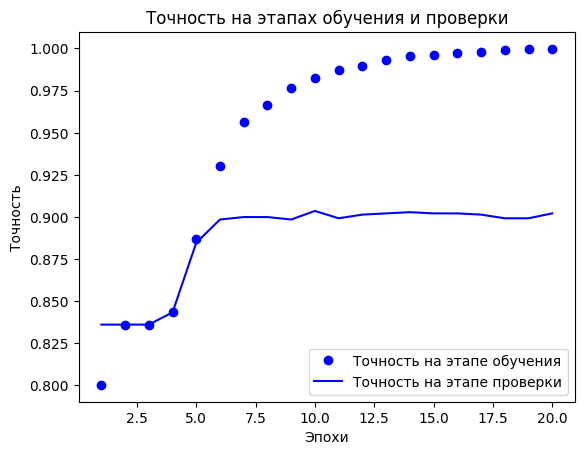

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Точность на этапе обучения')
plt.plot(epochs, val_acc_values, 'b', label = 'Точность на этапе проверки')
plt.title('Точность на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
# level 0,5 for text classification
y_pred = (y_pred >= 0.5).astype("int")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

44/44 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       226
           1       0.92      0.97      0.94      1152

    accuracy                           0.90      1378
   macro avg       0.85      0.76      0.80      1378
weighted avg       0.90      0.90      0.90      1378

[[ 126  100]
 [  35 1117]]
